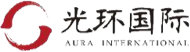

- 采集到原始的数据中会存在一些噪点数据，噪点数据是对分析无意义或者对分析起到偏执作用的数据。
- 如何清洗：
    - 清洗空值/缺失值
    - 清洗重复值
    - 清洗异常值

### 处理丢失数据


### pandas处理空值操作
- isnull
- notnull
- any
- all
- dropna
- fillna

- 方式1：对空值进行过滤（删除空所在的行数据）
    - 技术：isnull，notnull，any，all

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [4]:
df = DataFrame(data=np.random.randint(0,100,size=(7,5)))
df.iloc[0,3] = np.nan
df.iloc[3,3] = None
df.iloc[2,2] = np.nan
df.iloc[5,3] = np.nan
df

,0,1,2,3,4
0,65,90,33.0,NaN,36
1,10,5,46.0,69.0,47
2,66,89,NaN,27.0,91
3,79,77,39.0,NaN,18
4,34,90,51.0,14.0,90
5,27,78,98.0,NaN,0
6,91,52,11.0,55.0,62


In [6]:
df.isnull().any(axis=1) #True对应的行就表示存在空值

0     True
1    False
2     True
3     True
4    False
5     True
6    False
dtype: bool

In [8]:
df.notnull().all(axis=1) #False对应的行中表示存在空值

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [10]:
#使用布尔值作为源数据的行索引过滤空值对应的行数据
df.loc[df.notnull().all(axis=1)]

,0,1,2,3,4
1,10,5,46.0,69.0,47
4,34,90,51.0,14.0,90
6,91,52,11.0,55.0,62


- 方式2：
    - dropna：可以直接将缺失的行或者列进行删除

In [14]:
df.dropna(axis=0) #axis=0表示将空值对应的行删除，1表示将列删除

,0,1,2,3,4
1,10,5,46.0,69.0,47
4,34,90,51.0,14.0,90
6,91,52,11.0,55.0,62


- 想知道哪些列中存在缺失值

In [18]:
df.isnull().any(axis=0)

0    False
1    False
2     True
3     True
4    False
dtype: bool

- 统计每一列存在缺失值的数量/占比

In [21]:
for col in df.columns:
    if df[col].isnull().sum() > 0: #判断列中是否存在空值
        count = df[col].isnull().sum()
        p = count / df[col].size
        print(col,count,p)

2 1 0.14285714285714285
3 3 0.42857142857142855


- 对缺失值进行覆盖
    - fillna

In [23]:
df.fillna(value=-999) #使用任意值填充空值

,0,1,2,3,4
0,65,90,33.0,-999.0,36
1,10,5,46.0,69.0,47
2,66,89,-999.0,27.0,91
3,79,77,39.0,-999.0,18
4,34,90,51.0,14.0,90
5,27,78,98.0,-999.0,0
6,91,52,11.0,55.0,62


注意：希望使用有意义的值对空值进行填充。如何产生对空值填充是有意义的值。

In [27]:
#使用近邻值填充空值
df.fillna(method='ffill',axis=0).fillna(method='bfill',axis=0)

,0,1,2,3,4
0,65,90,33.0,69.0,36
1,10,5,46.0,69.0,47
2,66,89,46.0,27.0,91
3,79,77,39.0,27.0,18
4,34,90,51.0,14.0,90
5,27,78,98.0,14.0,0
6,91,52,11.0,55.0,62


In [29]:
#使用先关的统计指标填充空值:使用列的均值填充空值
for col in df.columns:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(value=mean_value,inplace=True)

In [30]:
df

,0,1,2,3,4
0,65,90,33.000000,41.25,36
1,10,5,46.000000,69.00,47
2,66,89,46.333333,27.00,91
3,79,77,39.000000,41.25,18
4,34,90,51.000000,14.00,90
5,27,78,98.000000,41.25,0
6,91,52,11.000000,55.00,62


- 如何选择对空值的处理呢？
    - 能删除尽量删除，如果删除的成本高，则可以使用填充处理空值

### 处理重复数据

- 基于duplicated和drop进行删除重复行操作

In [33]:
df = DataFrame(data=np.random.randint(0,100,size=(7,4)))
df.iloc[1] = [0,0,0,0]
df.iloc[3] = [0,0,0,0]
df.iloc[6] = [0,0,0,0]
df

,0,1,2,3
0,28,19,85,31
1,0,0,0,0
2,98,46,65,55
3,0,0,0,0
4,12,43,84,64
5,84,2,20,39
6,0,0,0,0


In [34]:
df.duplicated() #检测哪些行出现了重复

0    False
1    False
2    False
3     True
4    False
5    False
6     True
dtype: bool

In [35]:
#计算重复的行数
df.duplicated().sum()

2

In [37]:
#删除重复的行数据
df.drop_duplicates(inplace=True)

In [38]:
df

,0,1,2,3
0,28,19,85,31
1,0,0,0,0
2,98,46,65,55
4,12,43,84,64
5,84,2,20,39


### 处理异常/离群数据
异常值是分析师和数据科学家常用的术语，因为它需要密切注意，否则可能导致错误的估计。 简单来说，异常值是一个观察值，远远超出了样本中的整体模式。

异常值在统计学上的全称是疑似异常值，也称作离群点(outlier)，异常值的分析也称作离群点分析。异常值是指样本中出现的“极端值”，数据值看起来异常大或异常小，其分布明显偏离其余的观测值。异常值分析是检验数据中是否存在不合常理的数据，在数据分析中，既不能忽视异常值的存在，也不能简单地把异常值从数据分析中剔除。重视异常值的出现，分析其产生的原因，常常成为发现新问题进而改进决策的契机。

举个例子，做客户分析，发现客户的年平均收入是80万美元。 但是，有两个客户的年收入是4美元和420万美元。 这两个客户的年收入明显不同于其他人，那这两个观察结果将被视为异常值。

- 给定条件的异常数据处理
    - 自定义一个1000行3列（A，B，C）取值范围为0-1的数据源，然后将C列中的值大于其两倍标准差的异常值进行清洗

In [39]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [40]:
data = DataFrame(data=np.random.random(size=(1000,3)),columns=['A','B','C'])
data

,A,B,C
0,0.622186,0.074796,0.362055
1,0.367907,0.674392,0.197272
2,0.806180,0.136734,0.698139
3,0.678650,0.957729,0.759327
4,0.002554,0.364280,0.228224
...,...,...,...
995,0.413238,0.560435,0.682718
996,0.501851,0.262261,0.072390
997,0.038522,0.175438,0.150791
998,0.589357,0.281418,0.311423


In [41]:
value = data['C'].std() * 2
value

0.5824748399459727

In [44]:
p_df = data.loc[data['C'] > value] #取出了异常值对应的行数据

In [46]:
indexs = p_df.index #异常值对应的行索引
indexs

Int64Index([  2,   3,   5,   6,  11,  15,  16,  20,  22,  23,
            ...
            978, 980, 983, 987, 988, 989, 993, 994, 995, 999],
           dtype='int64', length=434)

In [48]:
data.drop(index=indexs,inplace=True)

In [49]:
data.shape

(566, 3)

- 标准差法
    - 又称为拉依达准则(标准差法)，对某些异常数据进行剔除，以提高数据的准确性。
    - 适用场景：
        - 仅局限于对正态或近似正态分布的样本数据处理，且数据量级尽可能大会更加适用。
    - 工作原理：
        - 先假设一组检测数据存在异常数据，对其进行计算处理得到标准偏差σ，然后确定一个区间，认为凡超过这个区间的就是异常数据，则对该数据予以剔除。
        - 标准差本身可以体现因子的离散程度，是基于因子的平均值μ而定的。在离群值处理过程中，可通过用μ ± nσ来衡量因子与平均值的距离（n通常使用3）。
            - 将区间[μ - 3σ,μ + 3σ]，的值视为正常值范围，在[μ - 3σ,μ + 3σ]外的值视为离群值。
            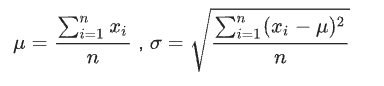

In [50]:
#伪造了一组含有5个异常数据的样本
iris_length = abs(np.random.randn(9999))
#手动添加一些异常数据
iris_length[44] = 54
iris_length[33] = 67
iris_length[22] = 56
iris_length[11] = 87
iris_length[55] = 49
iris_length

array([0.25201532, 0.70664396, 0.90539343, ..., 0.02049601, 0.23513532,
       0.34151906])

In [51]:
def std_opt(data):
    mean_value = data.mean()#均值
    std_value = data.std() #标准差
    m_min = mean_value - 3*std_value
    m_max = mean_value + 3*std_value
    return m_min,m_max

In [52]:
m_min,m_max = std_opt(iris_length)

for i in iris_length:
    if i < m_min or i > m_max:
        print(i)

87.0
56.0
67.0
54.0
49.0


- MAD法
    - 又称为绝对值差中位数法，是一种先需计算所有因子与中位数之间的距离总和来检测离群值的方法，适用大样本数据
    - 公式：设有平稳离散数据X=[x1,x2,...,xn]，其数据中位数为X_median：
        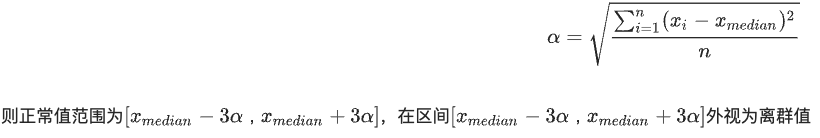
    - 应用场景：
        - 当数据呈对称分布或接近对称分布时MAD和标准差法效果相等或接近相等
        - 当数据为偏态分布，应选择众数或中位数等位置代表值，这时它们的代表性要比均值好。

In [53]:
def median_opt(data):
    median = np.median(data)
    count = data.size
    a = (((data-median)**2).sum()/count)**0.5
    m_min = median - 3*a
    m_max = median + 3*a
    return m_min,m_max

median_opt(iris_length)

(-3.9588920233670044, 5.303066111688458)

In [54]:
m_min,m_max = median_opt(iris_length)
for i in iris_length:
    if i < m_min or i > m_max:
        print(i)

87.0
56.0
67.0
54.0
49.0
